Answer 1.1
5 handles which have the highest number of followers : 

foodys : 10025333
thisisinsiderfood : 2214190
foodbabyny : 321232
dilsefoodie : 283136
foodtalkindia : 280602



Performing 2nd part, please wait...
Answer 1.2
foodys have posted 6 posts in last 3 days
thisisinsiderfood have posted 1 posts in last 3 days
foodbabyny have posted 7 posts in last 3 days
dilsefoodie have posted 3 posts in last 3 days
foodtalkindia have posted 5 posts in last 3 days



Answer 1.3 : Plotted a bar graph to show Number of followers and a scatter plot to show number of posts they have done in last 3 days.


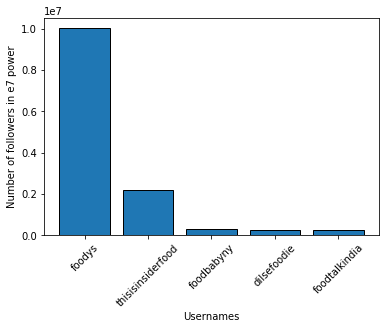

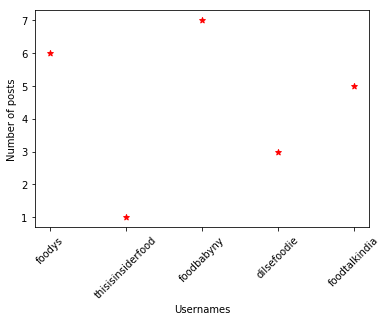

In [12]:
#Importing Libraries
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

#Navigate to Instagram URL
Instagram_url = "https://www.instagram.com"
driver = webdriver.Chrome(executable_path="C:/Users/preet_s/Desktop/chromedriver.exe")
driver.get(Instagram_url)

#Waiting for page to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'izU2O')))

#Navigating to login page by clicking login button
login_class = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[2]/p/a')
login_class.click()

##Waiting for login page to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'agXmL')))

#Locating Username tag and entering username
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'username')))
username_textbox = driver.find_element_by_name("username")
username_textbox.send_keys("")

#Locating Password tag and entering password
password_textbox = driver.find_element_by_name("password")
password_textbox.send_keys("")

#Locating Login button and clicking it to login into my instagram account
Login_submit = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/article/div/div[1]/div/form/div[4]/button/div')
Login_submit.click()


#Waiting for loading the instagram account
pageload_wait = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/nav/div[2]/div/div')))

#If you get popup for turning on Notification then click "Not Now"
try:
    popup_notification = driver.find_element_by_class_name("piCib")
    if popup_notification.is_displayed():
        not_now_button = driver.find_element_by_xpath("/html/body/div[3]/div/div/div[3]/button[2]")
        not_now_button.click()
        time.sleep(3)
except:
    pass

#waiting for search bar element to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo x3qfX "]')))

search_bar = driver.find_element_by_xpath('//input[@class = "XTCLo x3qfX "]')

#Searching for "food" through search bar
search_bar.send_keys("food")
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'yCE8d')))
search_list = driver.find_elements_by_class_name('yCE8d')

#Traversing top 10 handles we get after typing "food" and fetching its link
Dictionary_Number_of_Followers = {}
counter = 1
url_list = []
for i in search_list:
    if counter > 10:
        break
    url = i.get_attribute('href')
    if "/explore/" not in url:
        url_list.append(url)
        counter += 1

#Creating dictionary in descending order of Number of Followers and fetching top 5 usernames having highest number of followers
Dictionary_Number_of_Followers = {}
for i in url_list:
    driver.get(i)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/span/section/main/div/header/section/ul/li[2]/a/span')))
    Number_of_follower = driver.find_element_by_xpath("/html/body/span/section/main/div/header/section/ul/li[2]/a/span")
    username = i.split("/")[-2]
    Dictionary_Number_of_Followers[username] = int(Number_of_follower.get_attribute('title').replace(",",""))
print("Answer 1.1")
print("5 handles which have the highest number of followers : \n")
for i in sorted(Dictionary_Number_of_Followers.items(), key = lambda x : x[1],reverse=True)[:5]:
    print(i[0] , ":" ,i[1])
    
print("\n\n")
print("Performing 2nd part, please wait...")
print("Answer 1.2")

Number_of_posts_list = []
usernames_list = []
Number_of_followers = []

today = dat.today()

#Visit each handle among top 5 handles with highest number of follower.

for i in sorted(Dictionary_Number_of_Followers.items(), key = lambda x : x[1],reverse=True)[:5]:
    username = i[0]
    Number_of_followers.append(i[1])
    i = "https://www.instagram.com/"+i[0]+"/"    
    current_height = 0
    driver.get(i)
    posts_class_set = set()
    time_to_break = False
    
    #We will keep on scrolling the page and fetch posts currently visible on screen until we find a post that have been posted 4 or more days ago.
    
    while True:
        post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/span/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]')))
        posts_class = driver.find_elements_by_xpath("/html/body/span/section/main/div/div[3]/article/div[1]/div/div/div")
        
        #It will find 12 posts at a time so we will create set of psot to fetch unique posts on page.
        
        for i in posts_class:
            posts_class_set.add(i.find_element_by_tag_name("a").get_attribute("href"))
            
        current_height += 100
        driver.execute_script('window.scrollBy(0,arguments[0]);',current_height)
        time.sleep(4)
        current_height = driver.execute_script('return document.body.scrollHeight;')
        last_post_till_now = posts_class[-1].find_element_by_tag_name('a').get_attribute('href')
        driver.execute_script("window.open('"+last_post_till_now+"','icoTab');")
        handle = 1
        windows = driver.window_handles
        driver.switch_to.window(windows[handle])
        xpath_of_date_posted = "/html/body/span/section/main/div/div/article/div[2]/div[2]/a/time"
        post_date = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_of_date_posted)))
        date = post_date.get_attribute('datetime').split(".")[0]
        dt = parse(date)
        difference_of_date = (today - dt.date()).days
        driver.close()
        driver.switch_to.window(windows[0])
        if time_to_break is True:
            break
        if difference_of_date > 2:
            time_to_break = True
    result = 0
    
    #Now visit each post URL and fetch the date to filter the post which are posted more than 3 days ago
    
    for url in posts_class_set:
        driver.get(url)
        xpath_of_date_posted = "/html/body/span/section/main/div/div/article/div[2]/div[2]/a/time"
        post_date = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_of_date_posted)))
        date = post_date.get_attribute('datetime').split(".")[0]
        dt = parse(date)
        difference_of_date = (today - dt.date()).days
        if difference_of_date <= 2:
            result += 1
    
    print(username,"have posted",result,"posts in last 3 days")
    usernames_list.append(username)
    Number_of_posts_list.append(result)
print("\n\n")
print("Answer 1.3 : Plotted a bar graph to show Number of followers and a scatter plot to show number of posts they have done in last 3 days.")
plt.bar(usernames_list,Number_of_followers,edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel("Usernames")
plt.ylabel("Number of followers in e7 power")
plt.show()

Numpy_array_for_numberofposts = np.empty(5, dtype = int)
for i in range(len(Number_of_posts_list)):
    Numpy_array_for_numberofposts[i] = Number_of_posts_list[i]
plt.scatter(usernames_list,Number_of_posts_list,color="red",marker="*")
plt.xticks(rotation=45)
plt.xlabel("Usernames")
plt.ylabel("Number of posts")
plt.show()
driver.close()

5 handles which have the highest number of followers : 

foodys : 10025352
thisisinsiderfood : 2214191
foodbabyny : 321232
dilsefoodie : 283129
foodtalkindia : 280598



Visiting foodys profile and fetching top 10 posts and scraping content from those posts
	Content : ' What’s better than pizza? DOUBLE stacked Pizza 🍕 we give this 4/5 🤤🤤🤤🤤

How many drools do you give this? @foodyfetish @eastvillagepizza '
	Content : ' Baklava ASMR 🤤👂Sound up! How many drools would you give this?! I’m giving this 4/5 🤤🤤🤤🤤 @foodyfetish '
	Content : ' This fried chicken sandwich looks bommmmmb! 4/5 drools 🤤🤤🤤🤤 How many would you rate it? '
	Content : ' Summer ain’t over yet... 11 summer hacks! @twisted

How many drools would you give this? We give it 4/5 🤤🤤🤤🤤 '
	Content : ' @Tripactions is highlighting the best of NYC food! Go give them a follow! 🎥: @eastvillagepizza
.
.
.
#nyc #tripactions #biztravel #businesstravel #letsgo '
	Content : ' Fries topped steak and ale pie 🥧Oh baby!!! I give this 🤤🤤🤤 3/5 dr

	Content : ' New Shop In Amar Colony - Sharma Ji Ke Chole Bhature Cost 60Rs.
Its not good if we compare with Baba Nagpal Or Kake Ke Chole Bhature but still good.
Bhatura was really good no etxra oil and chole was without oil.
.
.
Overall experiance was above average and below good.
#dilsefoodie #cholekulche #cholebhature #poorichole #amarcolony '
	Content : ' Don't Forget To Watch This Video Today At 6.30pm On Youtube Channel. .
.
Cycle Wale Rasgulle & Meethi Bread In Just Rs 10
COMMENT below If You Ever Tasted This Or You Wanna Taste ❣️.
#dilsefoodie #Rasgulle #meethibread #foodie '
	Content : ' Hara Bhara Chicken Tikka At @tikkajunction 😍.
One if the best chicken tikka i had. Amazing marination superb taste.
One of the best place for Nonvegetarians
.
.
Tag Your Sharabi Dost And Try This Place.
#dilsefoodie #love #TFLers #tweegram #photooftheday #20likes #amazing #smile #follow4follow #like4like #look #instalike #igers #picoftheday #food #instadaily #instafollow #followme #streetfood 

@tikkajunction 1
.
One 1
tikka 1
had. 1
Amazing 2
marination 1
superb 1
taste.
One 1
Nonvegetarians
.
.
Tag 1
Your 1
Sharabi 1
Dost 1
And 2
Try 2
Place.
#dilsefoodie 1
#love 1
#TFLers 1
#tweegram 1
#photooftheday 1
#20likes 1
#amazing 1
#smile 1
#follow4follow 1
#like4like 1
#look 1
#instalike 1
#igers 1
#picoftheday 1
#food 1
#instadaily 1
#instafollow 1
#followme 1
#iphoneonly 1
#instagood 1
#bestoftheday 1
#instacool 1
#instago 1
#all_shots 1
#follow 1
#webstagram 1
#colorful 1
Tawa 2
Paneer 3
Momos
What 1
like 2
?
Normal 1
Momos 3
With 3
No 1
Innovation 1
Some 1
Fusion 1
Twist 1
Is 2
Okay 1
For 1
.
.
Watch 2
#gameofmomos 2
#paneer 1
#momos 2
Had 2
Famous 1
Hotdog 2
Vijay 2
Cart, 1
Chowk 1
Krishna 1
Nagar 1
Delhi.
.
Video 1
Up 1
Channel
.
Cost 1
110 1
Triple 1
Cheese 3
Hotdog
Tag 1
Someone 2
Who 2
Would 1
Love 2
This
#dilsefoodie 1
#hotdog 1
#cheese 1
#amul 1
#eastdelhi 1
Afghani 1
GAME 1
OF 1
MOMOS 1
#foodfood 2
Missing 1
Jaipur 1
Ka 1
Gulab 1
Chai 1
.
.
.
#dilsefoodie 1
#jaipur 1


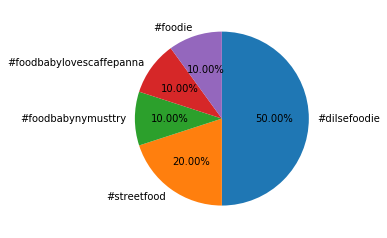

In [7]:
#Importing Libraries
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt

#Navigate to Instagram URL
Instagram_url = "https://www.instagram.com"
driver = webdriver.Chrome(executable_path="C:/Users/preet_s/Desktop/chromedriver.exe")
driver.get(Instagram_url)

#Waiting for page to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'izU2O')))

#Navigating to login page by clicking login button
login_class = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[2]/p/a')
login_class.click()

##Waiting for login page to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'agXmL')))

#Locating Username tag and entering username
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'username')))
username_textbox = driver.find_element_by_name("username")
username_textbox.send_keys("SAMPLE USERNAME")

#Locating Password tag and entering password
password_textbox = driver.find_element_by_name("password")
password_textbox.send_keys("SAMPLE PASSWORD")

#Locating Login button and clicking it to login into my instagram account
Login_submit = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/article/div/div[1]/div/form/div[4]/button/div')
Login_submit.click()


#Waiting for loading the instagram account
pageload_wait = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/nav/div[2]/div/div')))

#If you get popup for turning on Notification then click "Not Now"
try:
    popup_notification = driver.find_element_by_class_name("piCib")
    if popup_notification.is_displayed():
        not_now_button = driver.find_element_by_xpath("/html/body/div[3]/div/div/div[3]/button[2]")
        not_now_button.click()
        time.sleep(3)
except:
    pass

#waiting for search bar element to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo x3qfX "]')))

search_bar = driver.find_element_by_xpath('//input[@class = "XTCLo x3qfX "]')

#Searching for "food" through search bar
search_bar.send_keys("food")
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'yCE8d')))
search_list = driver.find_elements_by_class_name('yCE8d')

#Traversing top 10 handles we get after typing "food" and fetching its link
Dictionary_Number_of_Followers = {}
counter = 1
url_list = []
for i in search_list:
    if counter > 10:
        break
    url = i.get_attribute('href')
    if "/explore/" not in url:
        url_list.append(url)
        counter += 1

#Creating dictionary in descending order of Number of Followers and fetching top 5 usernames having highest number of followers
Dictionary_Number_of_Followers = {}
for i in url_list:
    driver.get(i)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/span/section/main/div/header/section/ul/li[2]/a/span')))
    Number_of_follower = driver.find_element_by_xpath("/html/body/span/section/main/div/header/section/ul/li[2]/a/span")
    username = i.split("/")[-2]
    Dictionary_Number_of_Followers[username] = int(Number_of_follower.get_attribute('title').replace(",",""))

print("5 handles which have the highest number of followers : \n")
for i in sorted(Dictionary_Number_of_Followers.items(), key = lambda x : x[1],reverse=True)[:5]:
    print(i[0] , ":" ,i[1])
    
print("\n\n")

Dictionary_of_words = {}
Dictionary_of_hashwords = {}

today = dat.today()
Number_of_followers = []
#Visit each handle among top 5 handles with highest number of follower.

for i in sorted(Dictionary_Number_of_Followers.items(), key = lambda x : x[1],reverse=True)[:5]:
    print("Visiting",i[0],"profile and fetching top 10 posts and scraping content from those posts")
    username = i[0]
    Number_of_followers.append(i[1])
    i = "https://www.instagram.com/"+i[0]+"/"    
    current_height = 0
    driver.get(i)
    posts_url_set = set()
    post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/span/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]')))
    posts_class = driver.find_elements_by_xpath("/html/body/span/section/main/div/div[3]/article/div[1]/div/div/div")
    
    #It will find 10 posts at a time so we will create set of post by fetching posts from page.
    
    for i in range(len(posts_class) - 2):
        posts_url_set.add(posts_class[i].find_element_by_tag_name("a").get_attribute("href"))
        
    #Visit each post and scrape content of post 
    
    for url in posts_url_set:
        driver.get(url)
        xpath_of_content_of_post = "/html/body/span/section/main/div/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span"
        content = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_of_content_of_post))).text
        print("\tContent : '",content,"'")
        content_words = content.split(" ")
        for word in content_words:
            word = word.encode('ascii', 'ignore').decode('ascii')
            if "#" in word:
                hash_words_separated = word.split("\n")
                for j in hash_words_separated:
                    if "#" in j and len(j)>1:
                        if j in Dictionary_of_hashwords:
                            Dictionary_of_hashwords[j] += 1
                        else:
                               Dictionary_of_hashwords[j] = 1
            if len(word) > 1:
                if word in Dictionary_of_words:
                    Dictionary_of_words[word] += 1
                else:
                    Dictionary_of_words[word] = 1
for key,value in zip(Dictionary_of_words.keys(),Dictionary_of_words.values()):
    print(key,value)
#Code to create dataframe and then create CSV after adding header to it and store csv with name word_freq.csv 

print("Creating a csv file with two columns : the word and its frequency")
list_of_numbers = list(range(1,len(Dictionary_of_words)+1))
dfObj = pd.DataFrame(list(Dictionary_of_words.items()),index=list_of_numbers)
dfObj.columns = ["Words","Frequency"]
dfObj.to_csv("word_freq.csv",index=False,encoding="utf-8")         
print("Operation Completed and file is created")

usernames_list = []
count_list = []
print("\nNow, finding the hashtags that were most popular among these bloggers:\n")
for i in sorted(Dictionary_of_hashwords.items(), key = lambda x : x[1],reverse=True)[:5]:
    usernames_list.append(i[0])
    count_list.append(i[1])
    print(i[0],":",i[1])
print("\nPlotting a Pie Chart of the top 5 hashtags obtained and the number of times.")
plt.pie(count_list,labels=usernames_list,autopct="%.2f%%",startangle=90,counterclock=False)
plt.show()
driver.close()

5 handles which have the highest number of followers : 

foodys : 10025371
thisisinsiderfood : 2214190
foodbabyny : 321233
dilsefoodie : 283127
foodtalkindia : 280597



Visiting foodys profile and fetching top 10 posts and scraping Number of Likes from them
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2mbU_8nOMd/ are 111719
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2hU9kJHlwD/ are 128291
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2pi-iJFw-4/ are 154724
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2j5CoBnXiz/ are 289456
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2e6k8mnUMU/ are 311478
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2sHKGOl6TU/ are 320239
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2pLdrVlG-G/ are 332738
		Likes on latest 10 posts : for url: https://www.instagram.com/p/B2pwHGlAXbF/ are 357167
		Likes on latest 10 

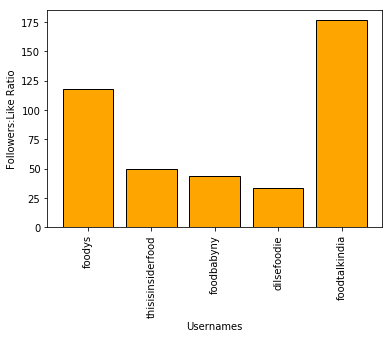

In [5]:
#Importing Libraries
import pandas as pd
from datetime import date as dat
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt

#Navigate to Instagram URL
Instagram_url = "https://www.instagram.com"
driver = webdriver.Chrome(executable_path="C:/Users/preet_s/Desktop/chromedriver.exe")
driver.get(Instagram_url)

#Waiting for page to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'izU2O')))

#Navigating to login page by clicking login button
login_class = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[2]/p/a')
login_class.click()

##Waiting for login page to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'agXmL')))

#Locating Username tag and entering username
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'username')))
username_textbox = driver.find_element_by_name("username")
username_textbox.send_keys("SAMPLE USERNAME")

#Locating Password tag and entering password
password_textbox = driver.find_element_by_name("password")
password_textbox.send_keys("SAMPLE PASSWORD")

#Locating Login button and clicking it to login into my instagram account
Login_submit = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/article/div/div[1]/div/form/div[4]/button/div')
Login_submit.click()


#Waiting for loading the instagram account
pageload_wait = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/nav/div[2]/div/div')))

#If you get popup for turning on Notification then click "Not Now"
try:
    popup_notification = driver.find_element_by_class_name("piCib")
    if popup_notification.is_displayed():
        not_now_button = driver.find_element_by_xpath("/html/body/div[3]/div/div/div[3]/button[2]")
        not_now_button.click()
        time.sleep(3)
except:
    pass

#waiting for search bar element to load completely
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@class = "XTCLo x3qfX "]')))

search_bar = driver.find_element_by_xpath('//input[@class = "XTCLo x3qfX "]')

#Searching for "food" through search bar
search_bar.send_keys("food")
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'yCE8d')))
search_list = driver.find_elements_by_class_name('yCE8d')

#Traversing top 10 handles we get after typing "food" and fetching its link
Dictionary_Number_of_Followers = {}
counter = 1
url_list = []
for i in search_list:
    if counter > 10:
        break
    url = i.get_attribute('href')
    if "/explore/" not in url:
        url_list.append(url)
        counter += 1

#Creating dictionary in descending order of Number of Followers and fetching top 5 usernames having highest number of followers
Dictionary_Number_of_Followers = {}
for i in url_list:
    driver.get(i)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/span/section/main/div/header/section/ul/li[2]/a/span')))
    Number_of_follower = driver.find_element_by_xpath("/html/body/span/section/main/div/header/section/ul/li[2]/a/span")
    username = i.split("/")[-2]
    Dictionary_Number_of_Followers[username] = int(Number_of_follower.get_attribute('title').replace(",",""))

print("5 handles which have the highest number of followers : \n")
for i in sorted(Dictionary_Number_of_Followers.items(), key = lambda x : x[1],reverse=True)[:5]:
    print(i[0] , ":" ,i[1])
    
print("\n\n")

ratio_list = []
usernames_list = []

today = dat.today()

#Visit each handle among top 5 handles with highest number of follower.

for i in sorted(Dictionary_Number_of_Followers.items(), key = lambda x : x[1],reverse=True)[:5]:
    print("Visiting",i[0],"profile and fetching top 10 posts and scraping Number of Likes from them")
    user = i[0]
    i_url = "https://www.instagram.com/"+i[0]+"/"    
    current_height = 0
    driver.get(i_url)
    posts_url_set = set()
    post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/span/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]')))
    posts_class = driver.find_elements_by_xpath("/html/body/span/section/main/div/div[3]/article/div[1]/div/div/div")
    
    #It will find 10 posts at a time so we will create set of post by fetching posts from page.
    
    for j in range(len(posts_class) - 2):
        posts_url_set.add(posts_class[j].find_element_by_tag_name("a").get_attribute("href"))
    likes_sum = 0
    
    #Visit each post url and fetch likes on the posts and calculating average likes on top 10 post of each handle. 
    #Then finding Followers : Likes ratio.
    
    for url in posts_url_set:
        driver.get(url) 
        xpath_page_load = "/html/body/span/section/main/div"
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_page_load)))
        driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN) 
        time.sleep(2)
        try:
            xpath_of_like = '//*[@id="react-root"]/section/main/div/div/article/div[2]/section[2]/div/div/button/span'
            number_of_like = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_of_like))).text
        except:
            xpath_of_views = "/html/body/span/section/main/div/div/article/div[2]/section[2]/div/span/span"                              
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_of_views)))
            click_views = driver.find_element_by_xpath(xpath_of_views)
            click_views.click()
            xpath_of_like = "/html/body/span/section/main/div/div/article/div[2]/section[2]/div/div/div[4]/span"
            number_of_like = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath_of_like))).text
                    
        likes_sum += int(number_of_like.replace(",",""))
        print("\t\tLikes on latest 10 posts : for url:",url,"are", likes_sum)
    average_likes_sum = int(likes_sum/5)
    print("\tAverage like for",user,"handle is",average_likes_sum)
    ratio = int(i[1])/int(average_likes_sum)
    print("\tFollowers:Average Like Ratio in",user,"is :",ratio)
    print("\n")
    ratio_list.append(ratio)
    usernames_list.append(i[0])
    
#Plotting Bar Graph
plt.bar(usernames_list,ratio_list,edgecolor="black",color="orange")
plt.xlabel("Usernames")
plt.ylabel("Followers:Like Ratio")
plt.xticks(rotation=90)
plt.show()
driver.close()